In [1]:
%load_ext autoreload

# Traces simulator v2

In [2]:
N_USERS = 200

In [3]:
%autoreload
from tracer.simulator import TraceSimulator

sim = TraceSimulator(
    number_towers=400,
    number_users=N_USERS,
    number_cycles=24,
    expander=1,
    sigma=0.0005,
    vel_friction=0.9,
    method='distance_square',
    distance_power=20,
#     verbose=True,
)

## Generate random user traces

In [4]:
sim.generate()

In [5]:
sim.traces.shape

(200, 24)

## Plot generated results

### Towers positions

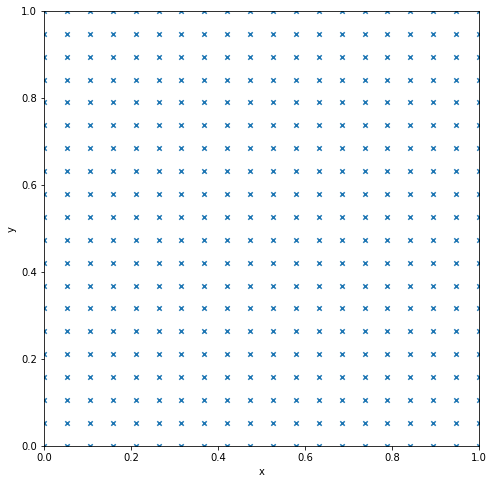

In [6]:
sim.towers_manager.plot_towers(annotate_towers=False);

### User trace

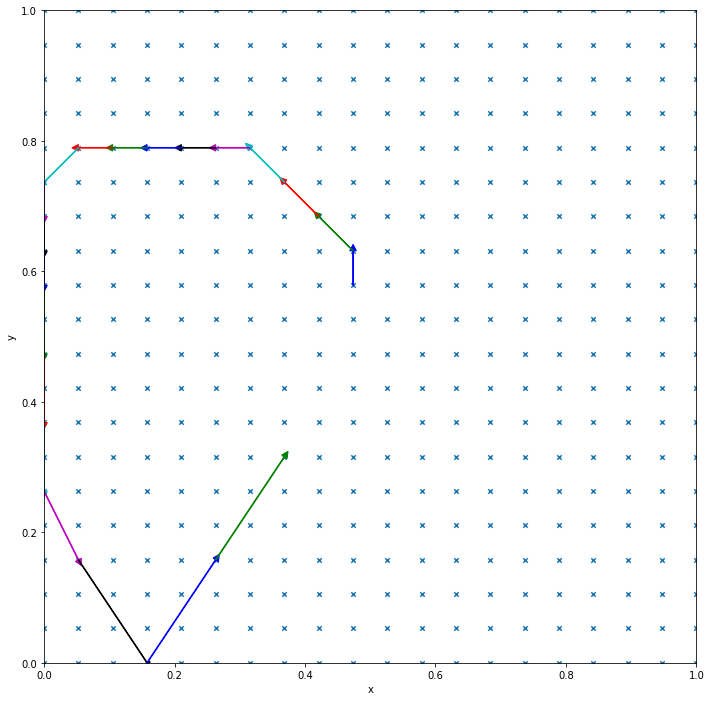

In [7]:
sim.towers_manager.plot_user_trace(sim.traces[2], annotate_towers=False)

In [8]:
sim.aggregated_data.shape

(24, 400)

# Trajectory recovery

In [9]:
%autoreload
import numpy as np
from tracer.recover import TrajectoryRecovery

tr = TrajectoryRecovery(
    number_users=N_USERS,
    towers=sim.towers,
    aggregated_data=sim.aggregated_data,
    vel_friction=0.9
)

In [10]:
tr.build_distribution_matrix()

In [11]:
tr.L.shape

(24, 200)

## Recover trajectories

Recovers the trajectories for each anonymous user and the costs on each step

In [12]:
res = tr.trajectory_recovery_generator()

In [13]:
# res['recovered_costs']

In [14]:
# tr.towers_manager.plot_user_trace(res['recovered_trajectories'][:, 1])

## Map recovered trajectories with real trajectories

global_accuracy = $\frac{1}{N} \sum_{i=1}^N \frac{|T_i \cap Y_i|}{|Y_i|}$

In [15]:
mapping, global_accuracy, acc = tr.map_traces(sim.traces)

In [16]:
global_accuracy

0.18229166666666669

For each recovered trajectory, see how many elements it has in common with the real one

In [17]:
dict(enumerate(acc))

{0: 8,
 1: 5,
 2: 5,
 3: 3,
 4: 4,
 5: 4,
 6: 5,
 7: 7,
 8: 4,
 9: 10,
 10: 11,
 11: 7,
 12: 5,
 13: 6,
 14: 7,
 15: 4,
 16: 3,
 17: 4,
 18: 3,
 19: 6,
 20: 3,
 21: 4,
 22: 5,
 23: 4,
 24: 6,
 25: 8,
 26: 13,
 27: 11,
 28: 6,
 29: 6,
 30: 7,
 31: 5,
 32: 6,
 33: 2,
 34: 6,
 35: 4,
 36: 5,
 37: 3,
 38: 5,
 39: 11,
 40: 6,
 41: 7,
 42: 4,
 43: 3,
 44: 7,
 45: 5,
 46: 16,
 47: 4,
 48: 4,
 49: 6,
 50: 5,
 51: 7,
 52: 10,
 53: 4,
 54: 5,
 55: 5,
 56: 6,
 57: 7,
 58: 5,
 59: 5,
 60: 6,
 61: 7,
 62: 5,
 63: 3,
 64: 9,
 65: 5,
 66: 3,
 67: 5,
 68: 4,
 69: 3,
 70: 3,
 71: 6,
 72: 3,
 73: 4,
 74: 4,
 75: 3,
 76: 5,
 77: 4,
 78: 8,
 79: 4,
 80: 3,
 81: 4,
 82: 8,
 83: 7,
 84: 6,
 85: 10,
 86: 5,
 87: 2,
 88: 6,
 89: 4,
 90: 6,
 91: 6,
 92: 7,
 93: 9,
 94: 2,
 95: 5,
 96: 1,
 97: 2,
 98: 3,
 99: 4,
 100: 8,
 101: 10,
 102: 4,
 103: 3,
 104: 4,
 105: 2,
 106: 6,
 107: 3,
 108: 2,
 109: 3,
 110: 1,
 111: 4,
 112: 2,
 113: 3,
 114: 5,
 115: 1,
 116: 2,
 117: 6,
 118: 4,
 119: 4,
 120: 5,
 121: 5,
 12

User 26 mapped to simulated trace 10


<Figure size 432x288 with 0 Axes>

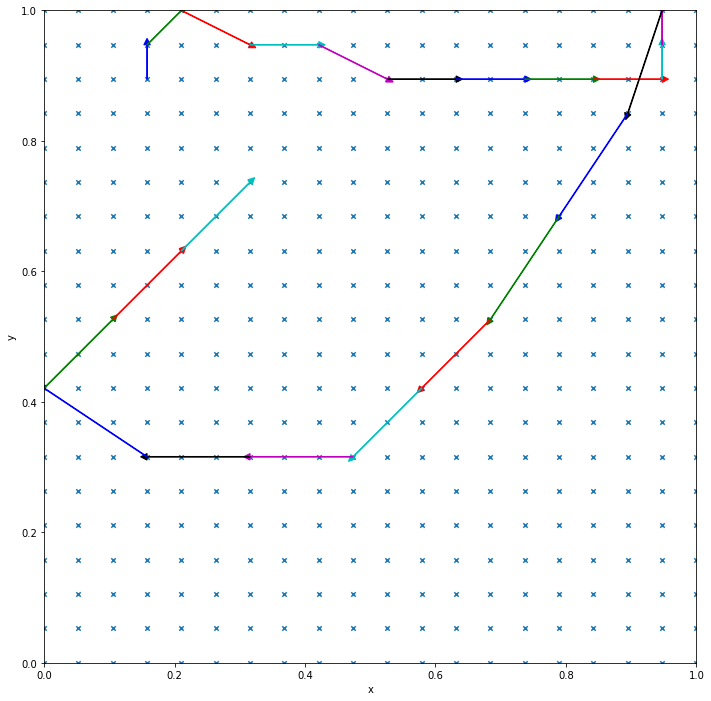

<Figure size 432x288 with 0 Axes>

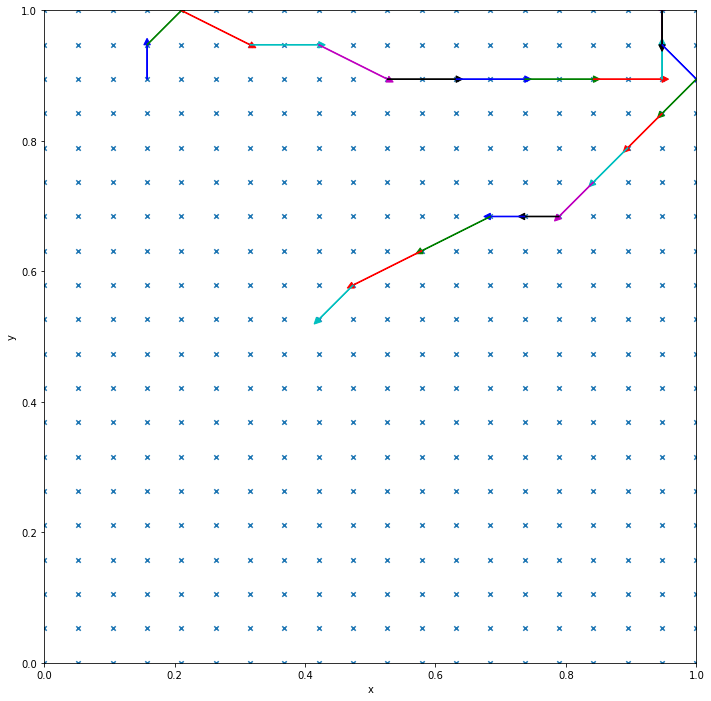

In [18]:
user = 26
recovered_trace = tr.S.T[user]
print(f'User {user} mapped to simulated trace {mapping[user]}')
mapped_trace = sim.traces[mapping[user]]

import matplotlib.pyplot as plt

plt.figure()
tr.towers_manager.plot_user_trace(recovered_trace, annotate_towers=False)

plt.figure()
tr.towers_manager.plot_user_trace(mapped_trace, annotate_towers=False)